In [30]:
import pandas as pd
from matplotlib import pyplot as plt
import math
from pylab import *

In [31]:
# funksjon for kinetisk energi
def kineticEnergy(mass, velocity):
 
    # formelen for kinetisk energi
    KineticEnergy = 0.5 * mass * velocity ** 2
 
    return KineticEnergy
 
# funskjon til å regne ut potensial energi
def potentialEnergy(mass, g , H):
 
    # Formelen for potensial energi
    PotentialEnergy = mass * g * H
 
    return PotentialEnergy

In [32]:
# inital verdiene
mass = 0.006 # [kg]
height = 0.8 #[m]
lenght = 1.2 # [m]
g = 9.81 # [m/s^2]
PE_0 = potentialEnergy(m, g, height) # potensial energi i starten = den totale energien

In [33]:
data = pd.read_csv("data.csv")

xPosition = data.x # Henter verdiene av posisjonene langs x-aksen
x = data.x.iloc[0] # første verdi x

yPosition = data.y # Henter verdiene av posisjonene langs y-aksen
y = data.y.iloc[0] # første verdi y

time = data.t # henter tidspunktene
t = data.t.iloc[0] # første verdi i

Text(0, 0.5, 'y-axis [m]')

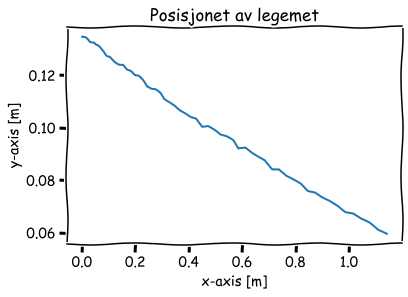

In [34]:
velocity = []
xVelocity = []
yVelocity = []
    
plt.xkcd() # decorate function

# plotter posisjonene
plt.plot(xPosition, yPosition)
plt.title("Posisjonet av legemet")
plt.xlabel("x-axis [m]")
plt.ylabel("y-axis [m]")

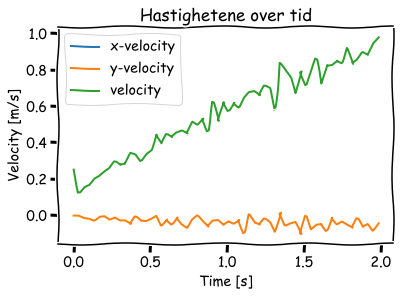

In [35]:
velocity = []
xVelocity = []
yVelocity = []

KineticE = []
PotentialE = []

# Beregner hastigheten 
for i in range(1, len(time)):
    temp_dt = time[i]-time[i-1]
    temp_dx = xPosition[i]-xPosition[i-1]
    temp_dy = yPosition[i]-yPosition[i-1]
    temp_velocity = math.sqrt(temp_dx**2 + temp_dy**2)
    
    KE = kineticEnergy(mass, temp_velocity)
    PE = potentialEnergy(mass, g, yPosition[i])
    
    xVelocity.append(temp_dx/temp_dt)
    yVelocity.append(temp_dy/temp_dt)
    velocity.append(temp_velocity/temp_dt)
    KineticE.append(KE)
    PotentialE.append(PE)

time = time[:-1]

plt.plot(time, xVelocity, label="x-velocity")
plt.plot(time, yVelocity, label="y-velocity")
plt.plot(time, velocity, label="velocity")

plt.title("Hastighetene over tid")
plt.xlabel("Time [s]")
plt.ylabel("Velocity [m/s]")

plt.legend()

Over kan vi se plotter av farten i x rettning (blått), y-rettining(orange) or total farten (grønt). Farten i x-rettning er ikke mulig å se og der er fordi, endringe i y-rettning er relativ lite som gjør at den titale farten går hovedsaklig i x-rettning. Grafene representerer ikke lineær endring i farten på grunn av feil som software "tracker" gjør under samling av data og avrunding som blir gjort av kompelatoren

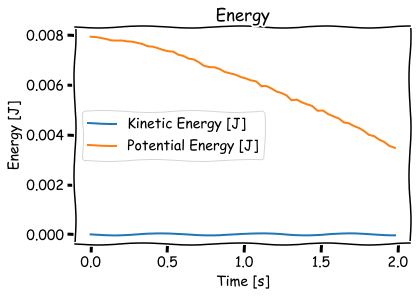

In [36]:
plt.title("Energy")
plt.plot(time, KineticE, label="Kinetic Energy [J]")
plt.plot(time, PotentialE, label="Potential Energy [J]")
plt.xlabel("Time [s]")
plt.ylabel("Energy [J]")
plt.legend()

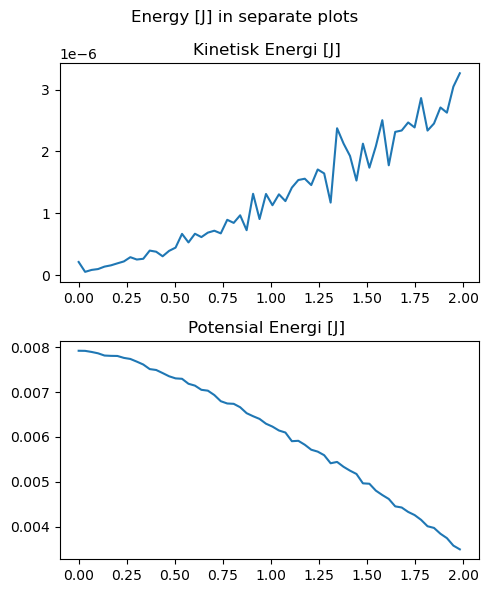

In [55]:
plt.rcdefaults()
fig, axs = plt.subplots(2, 1, figsize=(5, 6), tight_layout=True)
fig.suptitle('Energy [J] in separate plots')
axs[0].set_title("Kinetisk Energi [J] ")
axs[0].plot(time, KineticE)
axs[1].set_title("Potensial Energi [J] ")
axs[1].plot(time, PotentialE)